<a href="https://colab.research.google.com/github/venkatesh176/AI_Training/blob/main/confusion_matrix_part1_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
actual_labels = np.array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1])
predicted_labels = np.array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1])


In [ ]:
np.c_[actual_labels, predicted_labels]

array([[0, 0],
       [1, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1]])

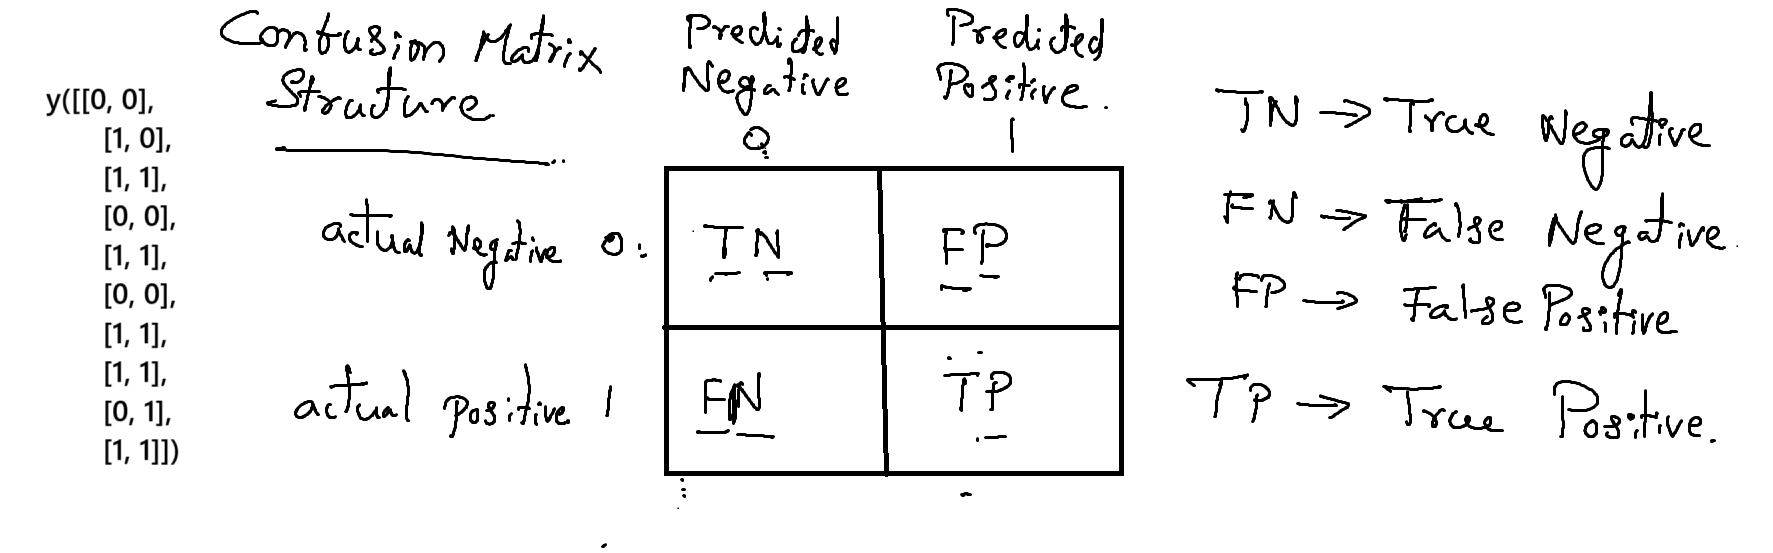

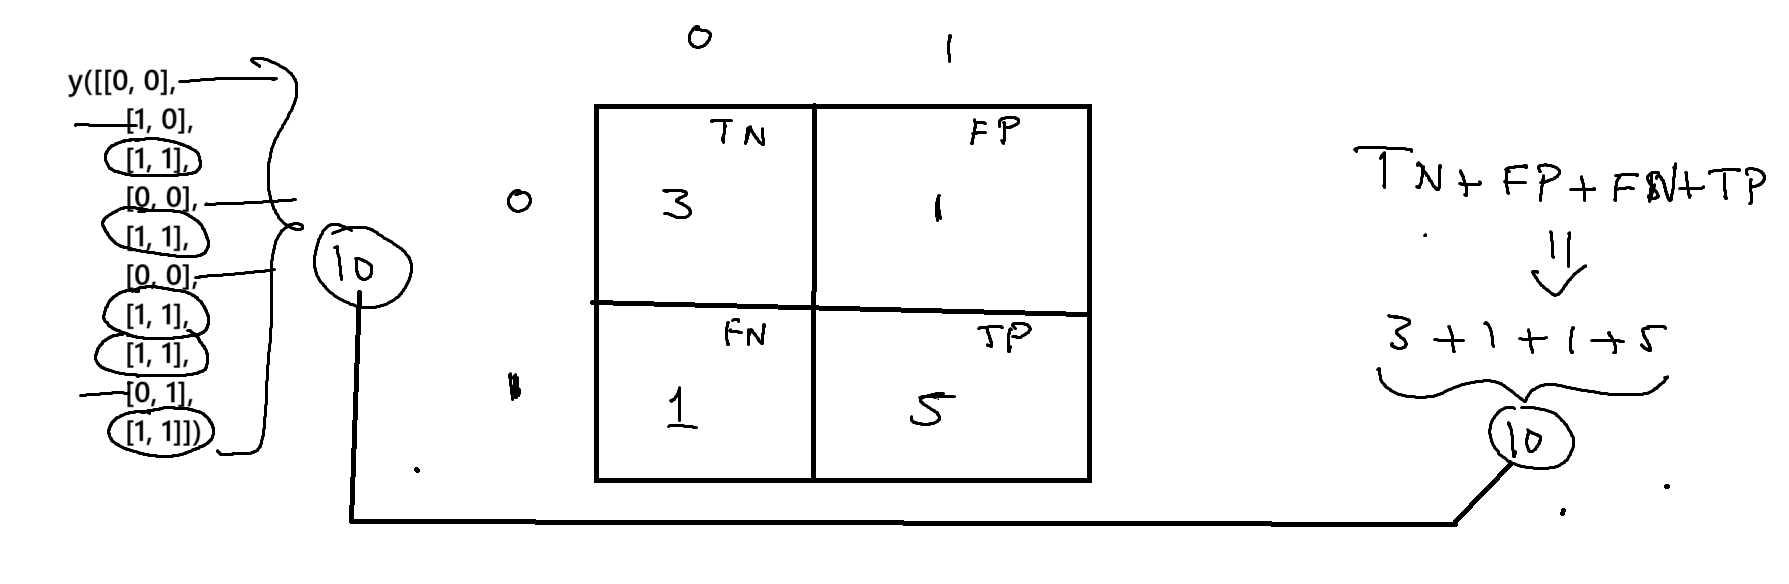



```


actual_labels = [1,0,1,0,1,1,0,0]
pred_labels   = [1,0,1,1,0,1,1,0]


			pred_negative	 pred_positve

actual_negative		  2			2

acutal_negative		  1			3


			pred_negative	 pred_positive

actual_negative			TN		FP

acutal_positive			FN		TP

row1,col1 --> True Negative
row1,col2 --> False Positive
row2,col1 --> False Negative
row2,col2 --> True Positive
-------------------------------------------------


[[3. 1.]
 [1. 5.]]


actual_labels = np.array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1])
predicted_labels = np.array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1])


		     pred_negative	pred_positive
actual_negative		3		1
actual_positive	        1		5

3 ---> TN
1 ---> FP
1 --> FN
5 --> TP


```



In [ ]:
actual_labels.size

10

In [ ]:
predicted_labels.size

10

In [ ]:
classes = np.unique(np.concatenate((actual_labels,predicted_labels )))
classes

array([0, 1])

In [ ]:
# initialize confusion matrix.
cm = np.zeros((len(classes), len(classes)))
cm

array([[0., 0.],
       [0., 0.]])

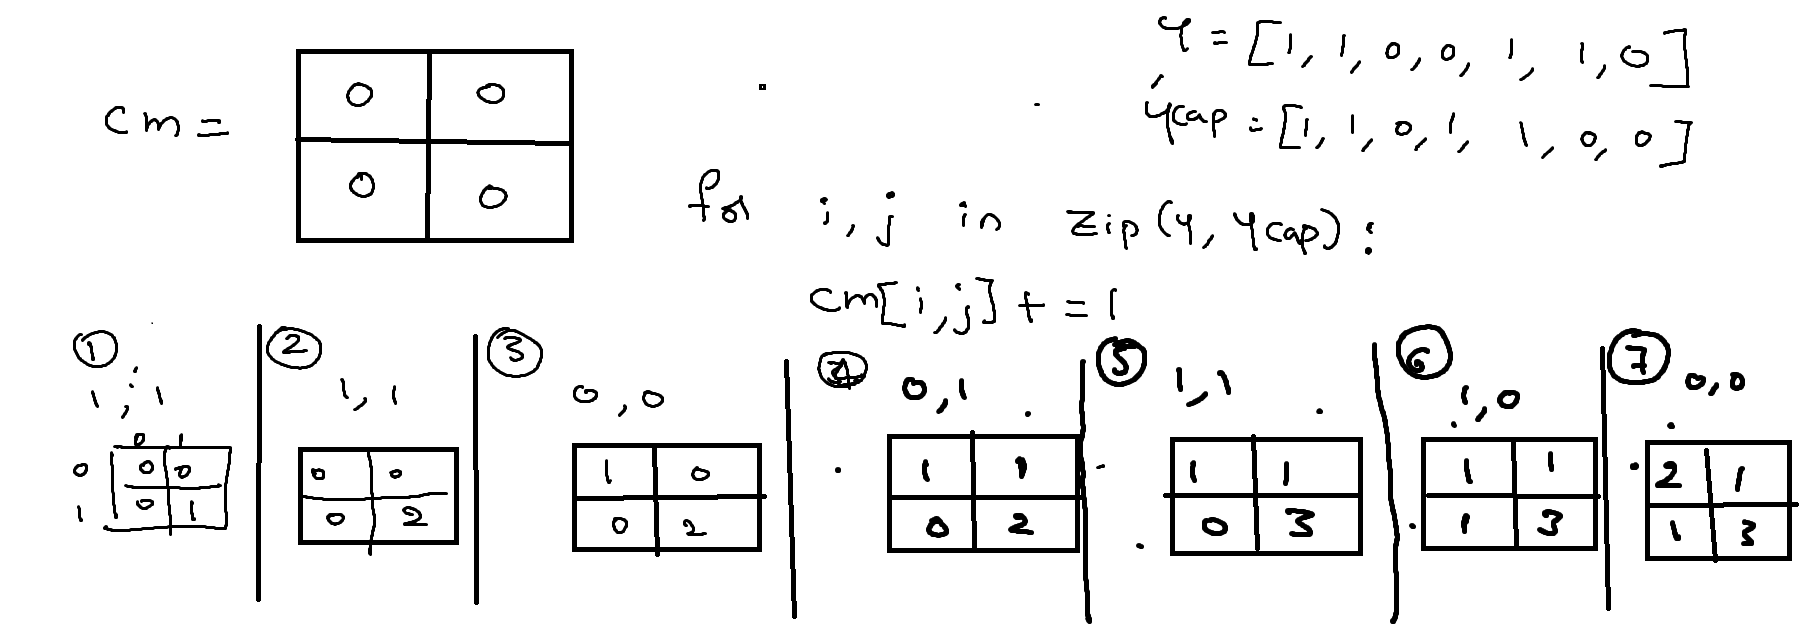

In [ ]:
# filling confusion matrix.
for a,p in zip(actual_labels, predicted_labels):
   cm[a, p] += 1
print(cm)

[[3. 1.]
 [1. 5.]]


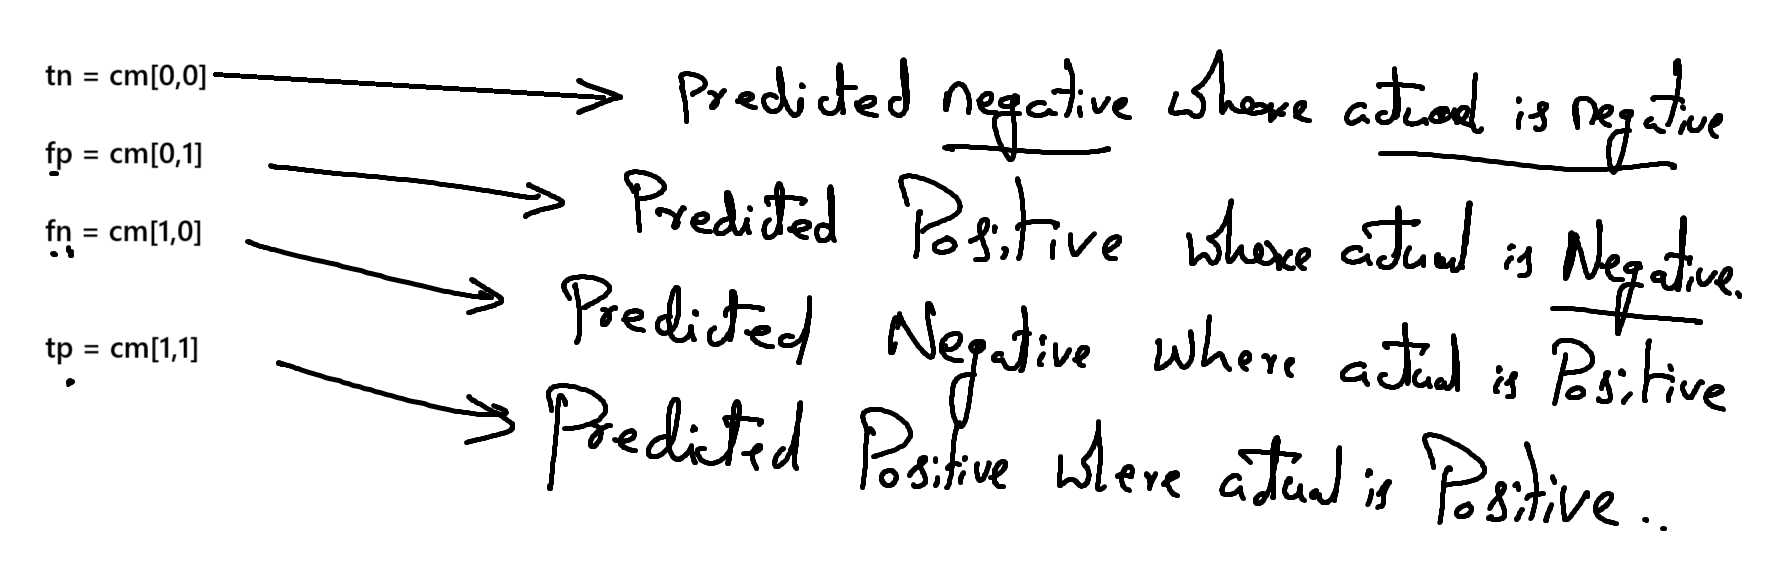

In [ ]:
tn = cm[0,0]
fp = cm[0,1]
fn = cm[1,0]
tp = cm[1,1]



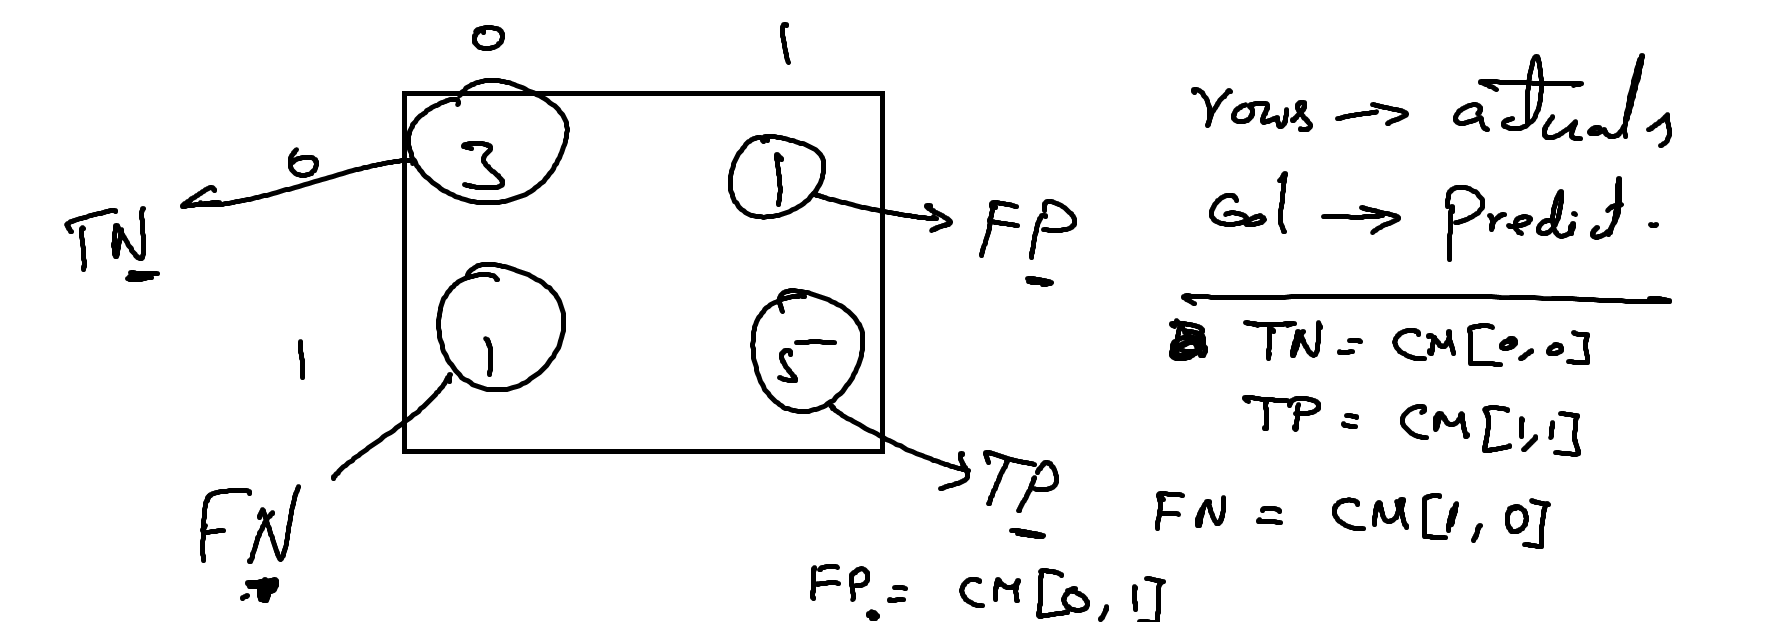

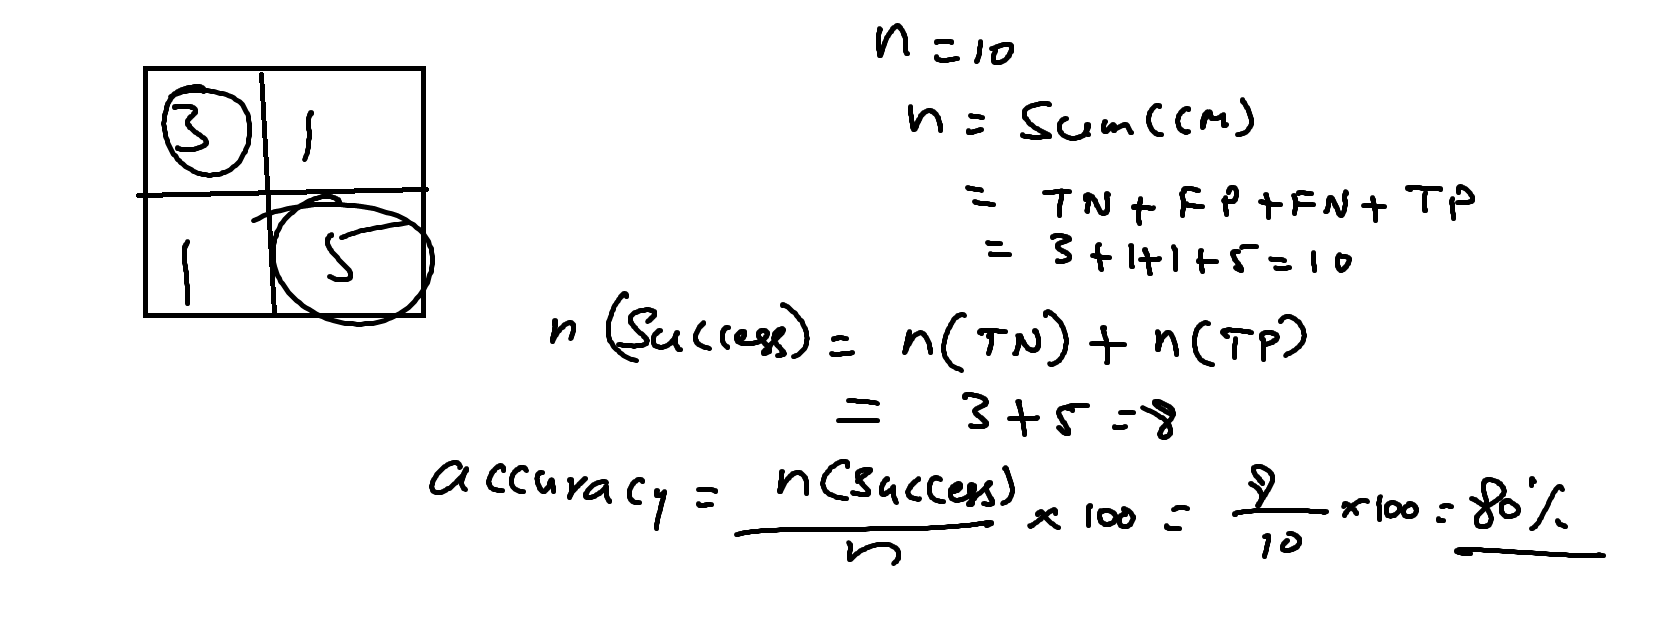

In [ ]:
accuracy = (tp+tn)/cm.sum() * 100
accuracy

np.float64(80.0)

In [ ]:
print(np.c_[actual_labels, predicted_labels])

[[0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]]


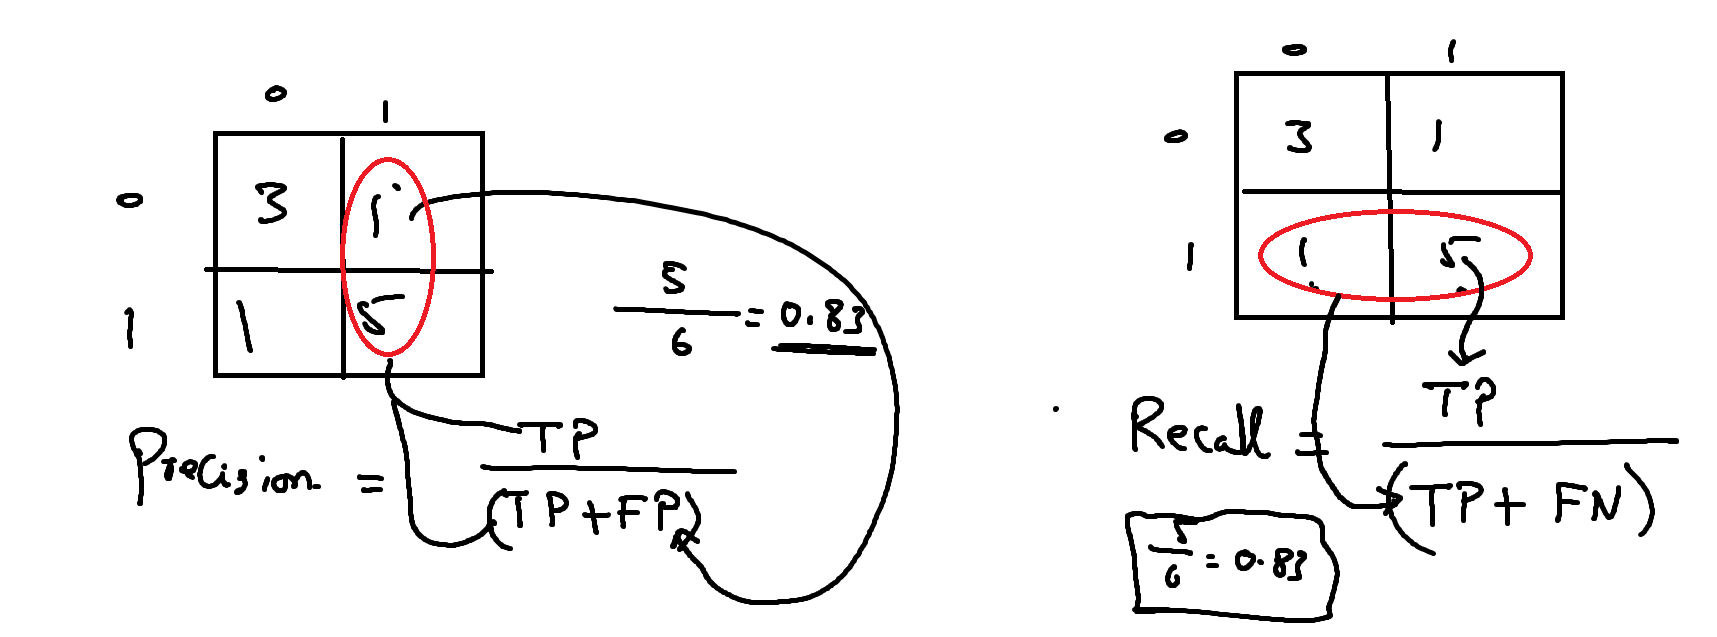

In [ ]:
# rate of correctness of positive predictions.
precision = tp/(tp+fp) * 100
# ratio between true positives and number of predicted positives
precision

np.float64(83.33333333333334)

In [ ]:
# rate of correctness of positive predictions with force of negative .
# ratio between true positives and number actual positives.
recall = tp/(tp+fn) * 100
recall

np.float64(83.33333333333334)

In [ ]:
# precision ---> positive prediction is high prioritive
# recall --> negative prediction is high priority.


In [ ]:
# f1 score is balance between precision and recall.
# f1 score is harmonic mean of precision and recall
f1_score  = 2 * (precision * recall)/(precision + recall)
f1_score

np.float64(83.33333333333334)

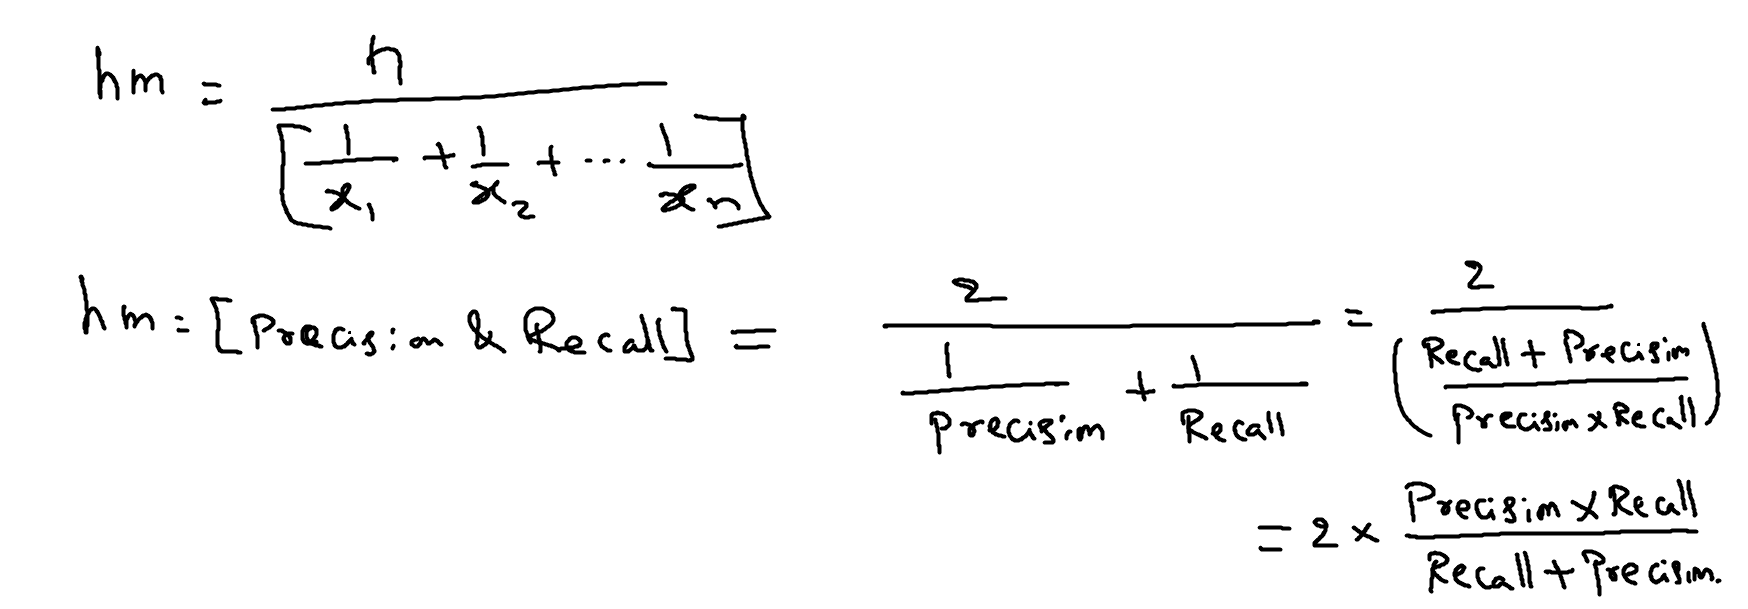

In [ ]:
metrics = np.array([precision , recall])
f1_score = metrics.size/(1/metrics).sum()
f1_score

np.float64(83.33333333333334)

In [ ]:
# to evaluate classification model , Confustion matrix is used.


In [ ]:
# scikit learn.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(actual_labels, predicted_labels)
cm

array([[3, 1],
       [1, 5]])

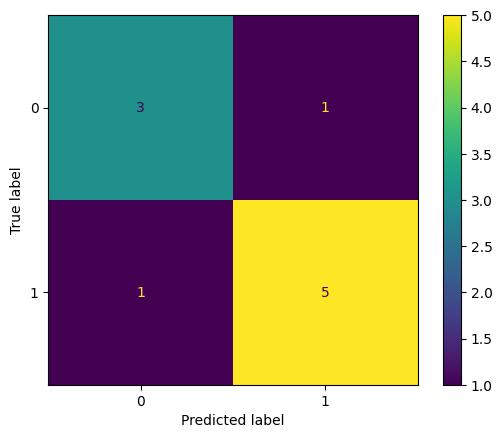

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(cm).plot()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(" accuracy :  "  , accuracy_score(actual_labels, predicted_labels)*100)


 accuracy :   80.0


In [ ]:
print(" precision : ", precision_score(actual_labels, predicted_labels))
print(" recall : ", recall_score(actual_labels, predicted_labels))
print(" f1_score : ", f1_score(actual_labels, predicted_labels))


 precision :  0.8333333333333334
 recall :  0.8333333333333334
 f1_score :  0.8333333333333334


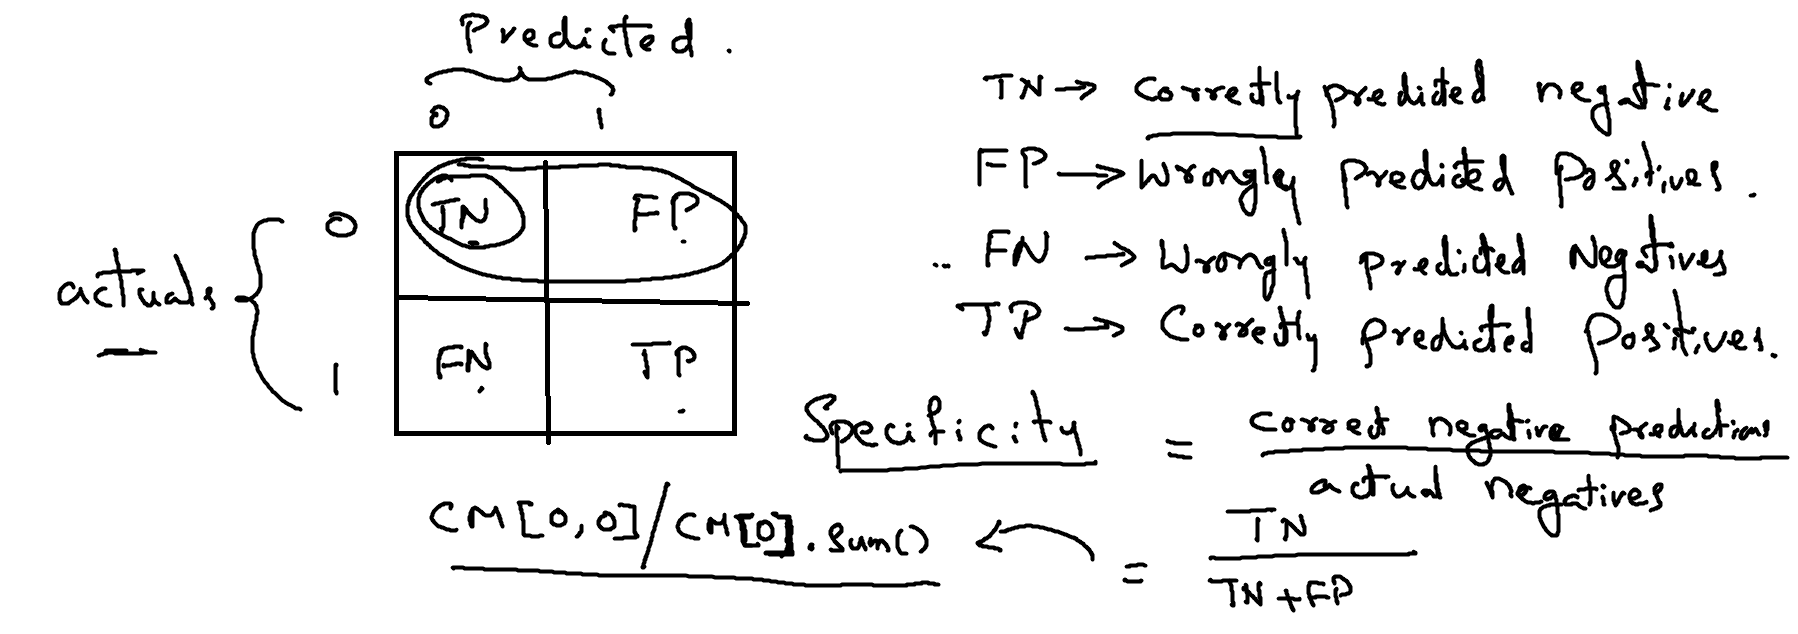

In [ ]:
# no predefined function in sklearn for specificity.
# tn/ (tn+fp)
cm

array([[3, 1],
       [1, 5]])

In [ ]:
tn , fp, fn, tp =  cm.ravel()

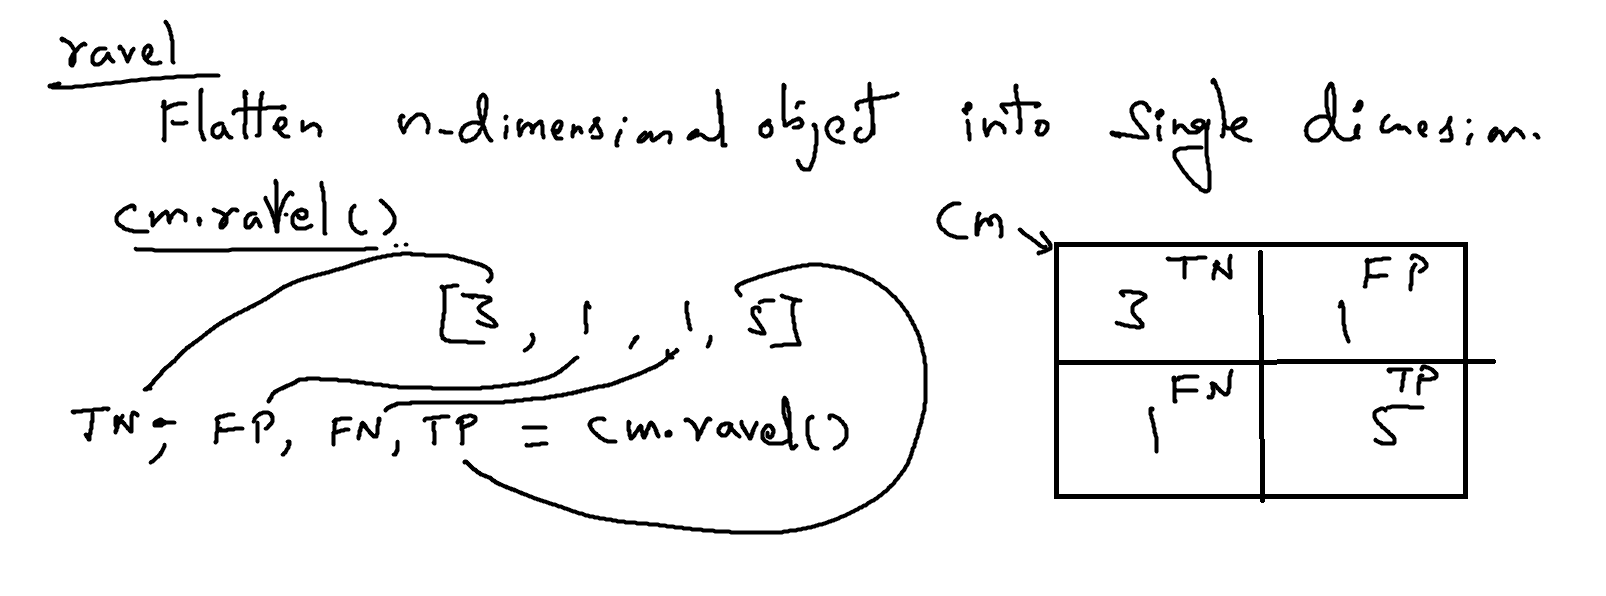

In [ ]:
specificity = tn/(tn+fp)
specificity

np.float64(0.75)

In [ ]:
# confusion matrix for multi class classifiers.

In [ ]:
y = [1,0,2,0,1,2,1,0,0,2,1]
len(y)

11

In [ ]:
ycap = [1,0,2,1,1,2,0,0,1,2,1]
len(ycap)

11

In [ ]:
cm = confusion_matrix(y,ycap)
cm

array([[2, 2, 0],
       [1, 3, 0],
       [0, 0, 3]])

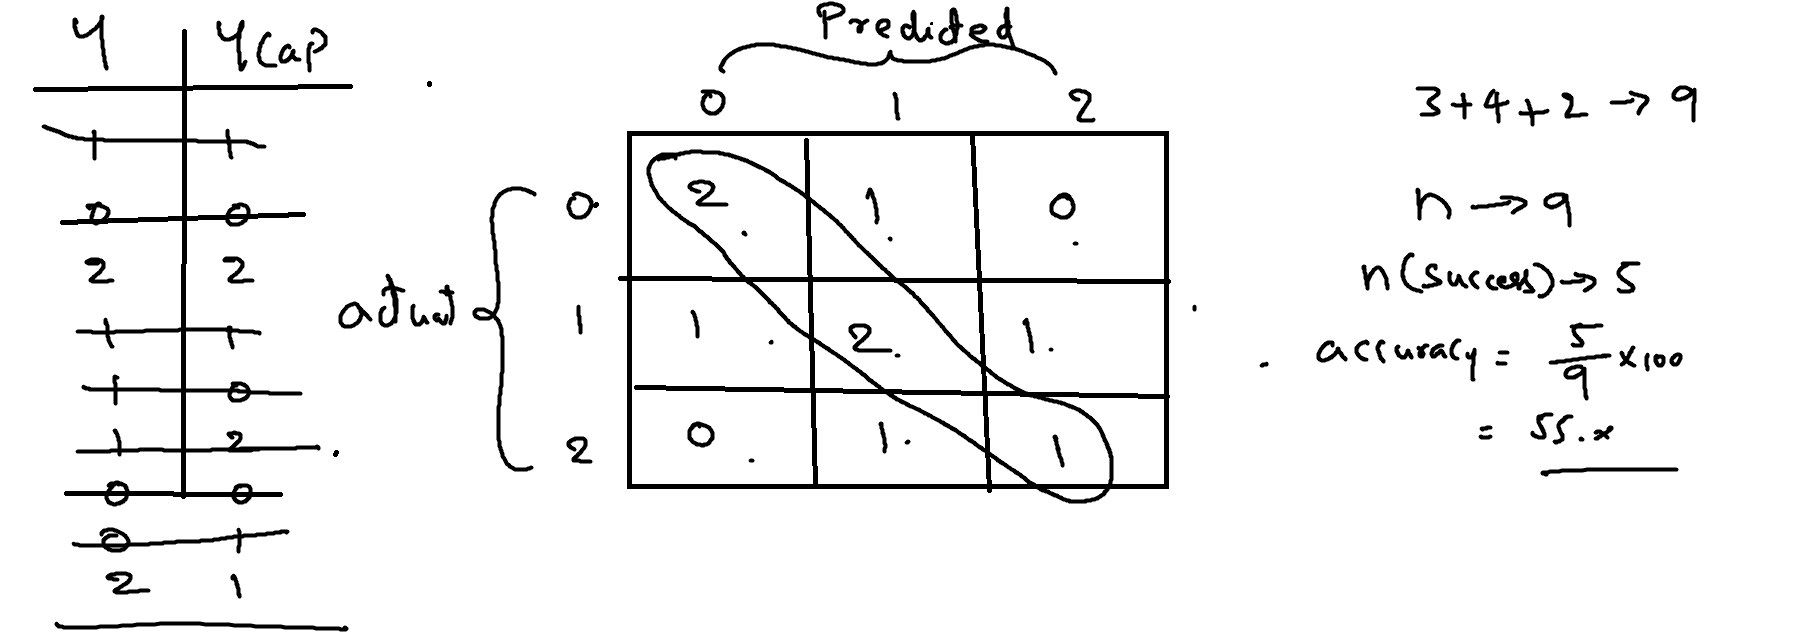

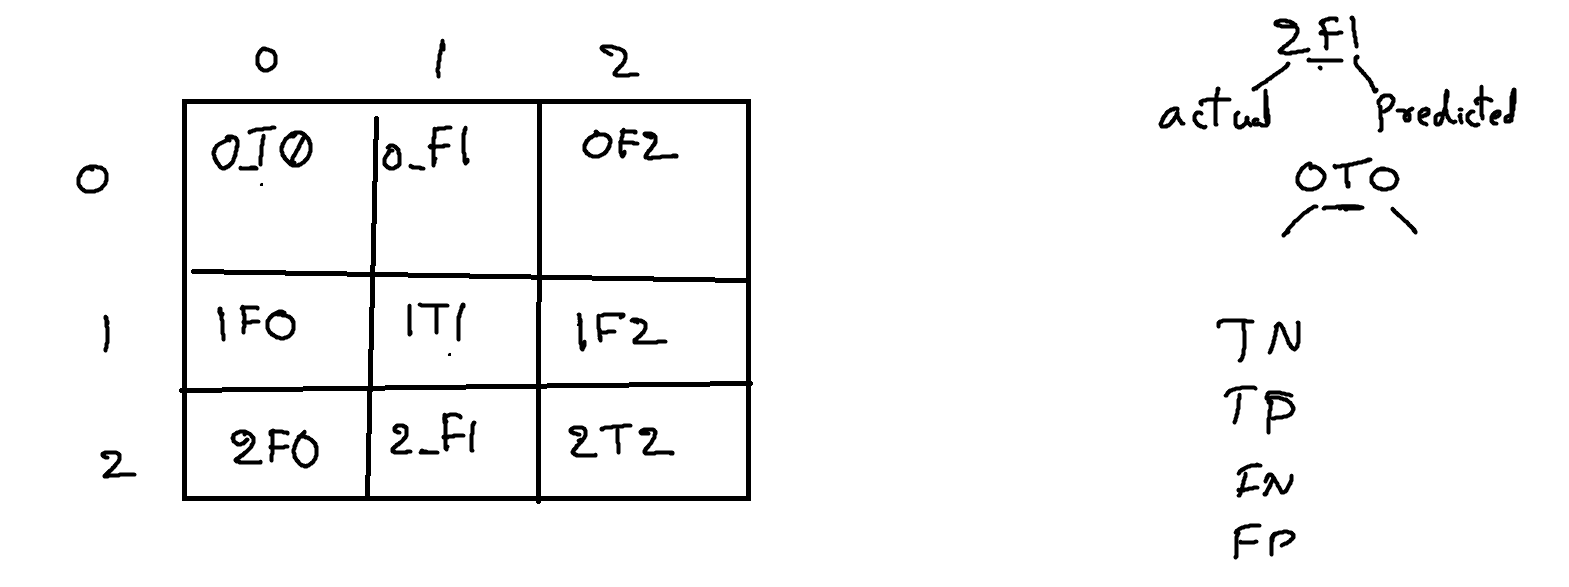

In [ ]:

print("Accuracy : " ,accuracy_score(y,ycap))
'''
print("precision  : " ,precision_score(y,ycap))
print("recall  : ",  recall_score(y,ycap))
print("f1 score :", f1_score(y,ycap))
'''
# multi  class cm dont support precision,recall, f1-score directly.
# you need to give average options --> None, micro, macro, weighted.



Accuracy :  0.7272727272727273


'\nprint("precision  : " ,precision_score(y,ycap))\nprint("recall  : ",  recall_score(y,ycap))\nprint("f1 score :", f1_score(y,ycap))\n'

In [ ]:
np.c_[y, ycap]

array([[1, 1],
       [0, 0],
       [2, 2],
       [0, 1],
       [1, 1],
       [2, 2],
       [1, 0],
       [0, 0],
       [0, 1],
       [2, 2],
       [1, 1]])

In [ ]:
precision_per_class = precision_score(y, ycap, average=None)
print("Precision per class:", precision_per_class)

# Calculate macro-averaged precision (unweighted mean of precision across all classes)
precision_macro = precision_score(y, ycap, average='macro')
print("Macro-averaged Precision:", precision_macro)

# Calculate micro-averaged precision (total true positives / total positives)
precision_micro = precision_score(y, ycap, average='micro')
print("Micro-averaged Precision:", precision_micro)

# Calculate weighted precision (weighted mean of precision considering class imbalance)
precision_weighted = precision_score(y, ycap, average='weighted')
print("Weighted Precision:", precision_weighted)


Precision per class: [0.66666667 0.6        1.        ]
Macro-averaged Precision: 0.7555555555555555
Micro-averaged Precision: 0.7272727272727273
Weighted Precision: 0.7333333333333333


In [ ]:
precision_per_class.mean()  # average='macro'
# average of independent precisions of each class.


np.float64(0.7555555555555555)



```
1. average=None (Precision per class)
When average=None, precision is calculated for each class individually without combining them.

This is useful if you want to see the performance of your model for each class separately.
```





```
2. average='macro' (Macro-averaged precision)
This calculates the unweighted mean of precision across all classes. Each class contributes equally to the final score, regardless of how many samples it has.

Useful when all classes are equally important, even if their frequencies differ.

Mean of precisions across classes: (1.0 + 0.5 + 0.5) / 3 = 0.6667

```





```
3. average='micro' (Micro-averaged precision)
This considers the total number of true positives and false positives across all classes. It's equivalent to calculating precision globally for all samples.

Useful in cases of imbalanced class distributions where the focus is on overall precision.

example
Total true positives: 3

Total predicted positives: 6

Micro-averaged precision: 3 / 6 = 0.5
```





```
4. average='weighted' (Weighted precision)
This calculates the mean precision, weighted by the number of samples in each class. Classes with more samples have greater influence.

Useful when class imbalance is significant and you want to account for it.

Class weights:

Class 0: 2 samples, precision = 1.0

Class 1: 2 samples, precision = 0.5

Class 2: 2 samples, precision = 0.5

Weighted precision: (2 * 1.0 + 2 * 0.5 + 2 * 0.5) / 6 = 0.6667
```



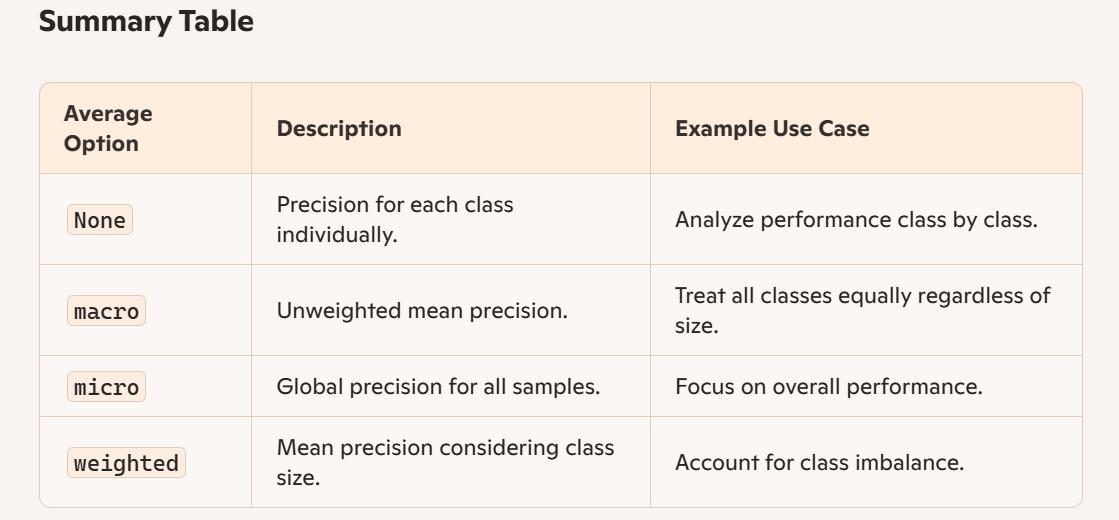

In [ ]:
recall_per_class = recall_score(y, ycap, average=None)
print("Precision per class:", recall_per_class)

# Calculate macro-averaged precision (unweighted mean of precision across all classes)
recall_macro = recall_score(y, ycap, average='macro')
print("Macro-averaged Precision:", recall_macro)

# Calculate micro-averaged precision (total true positives / total positives)
recall_micro = recall_score(y, ycap, average='micro')
print("Micro-averaged Precision:", recall_micro)

# Calculate weighted precision (weighted mean of precision considering class imbalance)
recall_weighted = recall_score(y, ycap, average='weighted')
print("Weighted Precision:", recall_weighted)


Precision per class: [0.5  0.75 1.  ]
Macro-averaged Precision: 0.75
Micro-averaged Precision: 0.7272727272727273
Weighted Precision: 0.7272727272727273


In [ ]:
f1_per_class = f1_score(y, ycap, average=None)
print("Precision per class:", f1_per_class)

# Calculate macro-averaged precision (unweighted mean of precision across all classes)
f1_macro = f1_score(y, ycap, average='macro')
print("Macro-averaged Precision:", f1_macro)

# Calculate micro-averaged precision (total true positives / total positives)
f1_micro = f1_score(y, ycap, average='micro')
print("Micro-averaged Precision:", f1_micro)

# Calculate weighted precision (weighted mean of precision considering class imbalance)
f1_weighted = f1_score(y, ycap, average='weighted')
print("Weighted Precision:", f1_weighted)


Precision per class: [0.57142857 0.66666667 1.        ]
Macro-averaged Precision: 0.746031746031746
Micro-averaged Precision: 0.7272727272727273
Weighted Precision: 0.722943722943723


In [ ]:
print(precision_score(y,ycap,average=None))
print(recall_score(y, ycap, average=None))
# interpretation.  model is behaving well for  class 2.
# most of predictions are wrong for class 0 and class 1.


[0.66666667 0.6        1.        ]
[0.5  0.75 1.  ]


In [ ]:
print(precision_score(y,ycap,average='macro'))
print(recall_score(y, ycap, average='macro'))


0.7555555555555555
0.75


In [ ]:
print(precision_score(y,ycap,average='micro'))
print(recall_score(y, ycap, average='micro'))


0.7272727272727273
0.7272727272727273


In [ ]:
print(precision_score(y,ycap,average='weighted'))
print(recall_score(y, ycap, average='weighted'))


0.7333333333333333
0.7272727272727273


In [ ]:
#why you should not consider only accuracy ?
'''

accuracy gives overall performance . based on number of successful predictions.

can not explain performance of each class independently.


y  yprob  ycap
0  0.49   0   --> success --> prob is close to 0.5 ,
0  0.1    0
1  0.51   1
1  0.99   1

'''


'\n\naccuracy gives overall performance . based on number of successful predictions.\n\ncan not explain performance of each class independently. \n\n\ny  yprob  ycap\n0  0.49   0   --> success --> prob is close to 0.5 , \n0  0.1    0\n1  0.51   1\n1  0.99   1\n\n'

In [ ]:
import pandas as pd
df = pd.read_csv('/content/diabetic.txt', sep='\t')
df.columns

Index(['Age', 'BMI', 'Blood Pressure', 'Glucose Level', 'Insulin Level',
       'Diabetic Status'],
      dtype='object')

In [ ]:
df.head()

,Age,BMI,Blood Pressure,Glucose Level,Insulin Level,Diabetic Status
0,45,25.3,120,140,85,Yes
1,50,28.1,130,155,90,Yes
2,38,23.5,115,110,75,No
3,60,31.2,135,160,95,Yes
4,55,29.8,128,150,92,Yes


In [ ]:
df['Diabetic Status'] = np.where(df['Diabetic Status']=='Yes', 1, 0)
df

,Age,BMI,Blood Pressure,Glucose Level,Insulin Level,Diabetic Status
0,45,25.3,120,140,85,1
1,50,28.1,130,155,90,1
2,38,23.5,115,110,75,0
3,60,31.2,135,160,95,1
4,55,29.8,128,150,92,1
5,32,22.7,110,105,70,0
6,42,26.5,118,135,80,0
7,48,27.3,125,145,88,1
8,35,24.1,113,120,78,0
9,58,30.5,132,158,93,1


In [ ]:
xdf = df.drop('Diabetic Status', axis=1)
X = xdf.to_numpy()
X.shape


(20, 5)

In [ ]:
X

array([[ 45. ,  25.3, 120. , 140. ,  85. ],
       [ 50. ,  28.1, 130. , 155. ,  90. ],
       [ 38. ,  23.5, 115. , 110. ,  75. ],
       [ 60. ,  31.2, 135. , 160. ,  95. ],
       [ 55. ,  29.8, 128. , 150. ,  92. ],
       [ 32. ,  22.7, 110. , 105. ,  70. ],
       [ 42. ,  26.5, 118. , 135. ,  80. ],
       [ 48. ,  27.3, 125. , 145. ,  88. ],
       [ 35. ,  24.1, 113. , 120. ,  78. ],
       [ 58. ,  30.5, 132. , 158. ,  93. ],
       [ 41. ,  25.8, 121. , 138. ,  82. ],
       [ 47. ,  27. , 126. , 144. ,  87. ],
       [ 36. ,  24.9, 114. , 122. ,  76. ],
       [ 53. ,  29.1, 130. , 148. ,  89. ],
       [ 40. ,  26. , 119. , 132. ,  81. ],
       [ 61. ,  31.5, 136. , 162. ,  96. ],
       [ 39. ,  23.8, 117. , 128. ,  77. ],
       [ 49. ,  27.5, 129. , 146. ,  90. ],
       [ 37. ,  24.5, 116. , 124. ,  79. ],
       [ 54. ,  30. , 133. , 150. ,  91. ]])

In [ ]:
y = df['Diabetic Status'].to_numpy()
y.shape

(20,)

In [ ]:
y

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [ ]:
model = LogisticRegression()
model.fit(X, y)


LogisticRegression()

In [ ]:
ycap = model.predict(X)

In [ ]:
np.c_[y, ycap]

array([[1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1]])

In [ ]:
accuracy_score(y, ycap)

1.0

In [ ]:
cm = confusion_matrix(y, ycap)


In [ ]:
cm

array([[ 9,  0],
       [ 0, 11]])

In [ ]:
mdf = pd.read_csv('/content/diabetic_multi_class.txt', sep='\t')
linfo = {'Low':0, 'Normal':1, 'High':2}
mdf['Diabetic Status'] = mdf['Diabetic Status'].map(linfo)
mdf

,Age,BMI,Blood Pressure,Glucose Level,Insulin Level,Diabetic Status
0,45,25.0,120,90,15,0
1,50,29.4,130,95,20,1
2,35,23.1,115,85,10,0
3,42,24.5,125,88,18,0
4,57,27.3,140,100,22,1
5,61,32.8,150,110,30,2
6,28,21.7,110,80,8,0
7,30,22.9,118,83,12,0
8,39,28.0,135,92,19,1
9,47,26.5,128,96,16,0


In [ ]:
X = mdf.drop('Diabetic Status', axis=1).to_numpy()
y = mdf['Diabetic Status'].to_numpy()


In [ ]:
model = LogisticRegression(max_iter=10000)
model.fit(X,y)
ycap = model.predict(X)

In [ ]:
accuracy_score(y, ycap)

1.0

In [ ]:
print(precision_score(y, ycap, average=None))
print(recall_score(y, ycap, average=None))


[1. 1. 1.]
[1. 1. 1.]


In [ ]:
print(precision_score(y, ycap, average='macro'))
print(recall_score(y, ycap, average='macro'))


1.0
1.0


In [ ]:
print(precision_score(y, ycap, average='micro'))
print(recall_score(y, ycap, average='micro'))



1.0
1.0


In [ ]:
print(precision_score(y, ycap, average='weighted'))
print(recall_score(y, ycap, average='weighted'))



1.0
1.0
